# TP Prétraitement des données (Titanic)

## Étape 1: Importation et aperçu des données

**1. Importer la bibliothèque pandas et charger le dataset Titanic depuis le lien suivant :**
https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
dans un DataFrame nommé `df`.

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

**2. Afficher les 5 premières lignes du dataset.**

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**2. Afficher les 5 dernières lignes du dataset.**

In [4]:
print(df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


**3. Afficher les dimensions du dataset (nombre de lignes et de colonnes).**

In [5]:
print(df.shape)

(891, 12)


**4. Afficher les informations générales sur les colonnes et leurs types (`info()`).**

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Étape 2: Nettoyage des données

**1. Supprimer les colonnes inutiles du DataFrame :**
`['PassengerId', 'Name', 'Ticket', 'Cabin']`.

In [7]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)

**2. Vérifier s'il existe des lignes doublons dans le dataset (`duplicated().sum()`).**

In [8]:
duplicates = df.duplicated().sum()

print("number of duplicated rows: ",int(duplicates))

number of duplicated rows:  111


**3. Supprimer les doublons et vérifier le nombre de lignes après suppression.**

In [9]:
print("Number of rows with duplicates: ",df.shape[0])
df.drop_duplicates()
print("Number of rows without duplicates: ",df.shape[0])


Number of rows with duplicates:  891
Number of rows without duplicates:  891


**4. Vérifier les valeurs manquantes.**

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**5. Imputer les valeurs manquantes de la colonne `Age` par la moyenne (strategy='mean').**

In [11]:
from sklearn.impute import SimpleImputer

In [12]:

imputer = SimpleImputer(strategy="mean")
cols = ['Age']
df[cols] = imputer.fit_transform(df[cols])

# using fillna(value,inplace=True) 
# df["Age"].fillna(df['Age'].mean(),inplace=True) 

**6. Remplacer les valeurs manquantes de la colonne `Embarked` par la valeur la plus fréquente (strategy='most_frequent').**

*Note: Vous pouvez utiliser `SimpleImputer` ou `df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)`.*

In [13]:
imputer = SimpleImputer(strategy="most_frequent")
cols = ["Embarked"]
df[cols] = imputer.fit_transform(df[cols])

# using fillna(value,inplace=True) 
# df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

**7. Vérifier qu'il ne reste plus de valeurs manquantes après imputation.**

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Étape 3: Analyse univariée

**1. Afficher les statistiques descriptives des colonnes numériques (`describe()`).**

In [15]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2. Afficher les colonnes numériques du DataFrame à l'aide de**
`df.select_dtypes (include=['float64']).columns`.

In [30]:
cols = df.select_dtypes(include=["float64"]).columns
print(cols)

Index(['Age', 'Fare'], dtype='object')


**3. Créer un histogramme de la variable `Age` avec Seaborn (`sns.histplot`) et afficher la courbe de densité (`kde=True`).**

<Axes: xlabel='Age', ylabel='Count'>

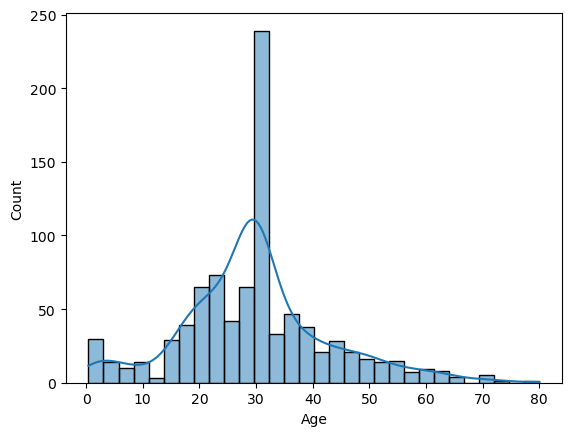

In [ ]:
import seaborn as sns

sns.histplot(data=df,x="Age",kde=True)


**4. Créer un boxplot pour la même variable `Age` et interpréter la position de la médiane.**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3587316d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3587316fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3587316c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3587317250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3587317390>],
 'means': []}

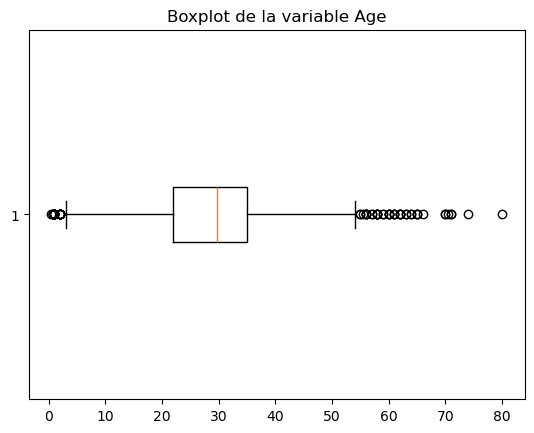

In [66]:
import matplotlib.pyplot as plt


plt.title("Boxplot de la variable Age")
plt.boxplot(data=df,x="Age",orientation="horizontal")


<div style="color:red"><b>Interprétation:</b> La distribution des âges est presque symétrique. La médiane est centrée dans la boîte</div>

**5. Répéter les deux graphiques précédents pour la variable `Fare` et interpréter les résultats.**

<Axes: xlabel='Fare', ylabel='Count'>

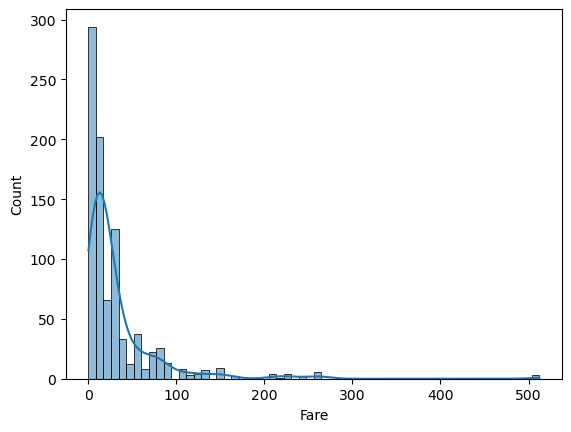

In [65]:
# Histogramme pour Fare

import seaborn as sns

sns.histplot(data=df,x="Fare",kde=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f357c124690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f357c124910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f357c124550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f357c124b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f357c124cd0>],
 'means': []}

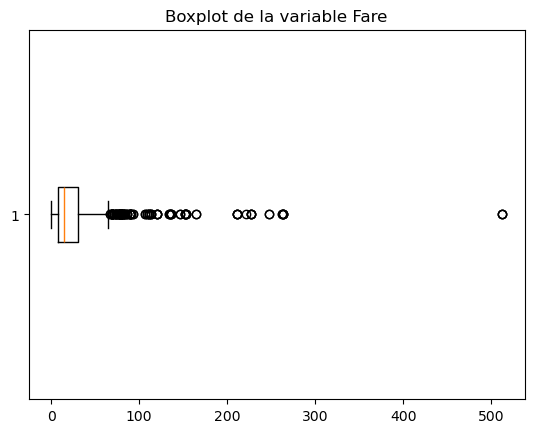

In [57]:
# Boxplot pour Fare
import matplotlib.pyplot as plt


plt.title("Boxplot de la variable Fare")
plt.boxplot(data=df,x="Fare",orientation="horizontal")

<div style="color:red"><b>Interprétation:</b> La médiane est décalée vers la gauche <b>==></b> presque tout le monde a payé un prix très bas</div>

## Étape 4: Suppression des valeurs aberrantes (méthode IQR)

**1. Calculer les premier (Q1) et troisième (Q3) quartiles de la variable `Age`.**
**2. Calculer l'écart interquartile (IQR) à partir de Q1 et Q3.**
**3. Déterminer les bornes inférieure et supérieure :**
   - $borne\ inférieure = Q1 - 1.5 \times IQR$
   - $borne\ supérieure = Q3 + 1.5 \times IQR$
**4. Filtrer le DataFrame pour ne garder que les valeurs de `Age` comprises entre ces deux bornes.**

In [20]:
# Traitement pour Age

**5. Répéter la même opération pour la variable `Fare`.**

In [21]:
# Traitement pour Fare

**6. Afficher à nouveau les boxplots de `Age` et `Fare` après suppression des outliers.**

In [22]:
# Boxplot Age après suppression

In [23]:
# Boxplot Fare après suppression

## Étape 5: Analyse bivariée

**1. Calculer la matrice de corrélation entre `Age` et `Fare` (`df[['Age', 'Fare']].corr()`).**

**2. Créer un scatter plot (nuage de points) représentant la relation entre `Age` et `Fare`.**
**3. Colorer les points selon la variable `Pclass` (`hue='Pclass'`).**
**4. Ajouter une ligne de régression linéaire sur le scatter (`sns.regplot` ou `sns.lmplot`).**

**5. Créer un diagramme en barres représentant le nombre total de passagers par `Pclass` et `Sex`.**

**6. Créer un diagramme en barres représentant la moyenne d'âge des passagers par `Pclass` et `Sex`.**

**7. Interpréter les résultats.**

*Écrivez votre interprétation ici...*

## Étape 6: Séparation des variables (features) de la variable (target)

**1. Séparer la variable cible `Survived` du reste du dataset (définir `X` et `y`).**

In [24]:
# Assurez-vous que 'Survived' est bien orthographié (commence par une majuscule comme dans le CSV original)
# Si vous l'avez nettoyé, ajustez le nom.

## Étape 7: Encodage et normalisation

**1. Appliquer un `LabelEncoder` sur la variable `Sex`.**

In [25]:
from sklearn.preprocessing import LabelEncoder

**2. Appliquer un `OneHotEncoder` sur la variable `Embarked`.**

*Note: L'utilisation de `pd.get_dummies(X, columns=['Embarked'])` est souvent plus simple pour cette étape.*

In [26]:
from sklearn.preprocessing import OneHotEncoder
# ou utilisez pd.get_dummies

**3. Vérifier la forme finale du dataset `X` après l'encodage.**

**4. Appliquer une standardisation (`StandardScaler`) sur les variables `Age` et `Fare`.**

In [27]:
from sklearn.preprocessing import StandardScaler

# Attention : Il est préférable d'appliquer le scaler APRÈS la séparation Train/Test 
# pour éviter le data leakage (fit sur train, transform sur train et test).
# Mais si on suit la consigne à la lettre :

## Étape 8: Séparation du jeu de données

**1. Séparer les données en deux ensembles :**
- 80% pour l'entraînement
- 20% pour le test
Utilisez le paramètre `random_state=1` afin de garantir que la répartition soit identique à chaque exécution du programme.

In [28]:
from sklearn.model_selection import train_test_split

**2. Afficher les dimensions de `X_train`, `X_test`, `y_train` et `y_test`.**

## Étape 9: Vérification finale

**1. Vérifier les dimensions des ensembles d'entraînement et de test pour s'assurer que la division a bien été effectuée.**

In [29]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

NameError: name 'X_train' is not defined